In [2]:
#Speaker ID Array to to be considered Task 1#
speaker_id=["84", "174", "251", "422", "652", "777", "1272", "1462", "1673", "1919", "1988", "1993", "2035", "2078", "2086", "2277", "2412", "2428","2803","2902", "3000", "3081","3170","8842","3576","3752","3853","5338","5536","5694","5895","6241","6295","6313","6319","6345","7850", "7976", "8297"]


In [3]:
#All Imports#
import numpy as np
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#All Variable and Static Values Initialization#
speaker_info=[]
extracted_features_seg=[]
extracted_features_frame=[]
speakers_ground_truth = []
gender_ground_truth = []
speakers_ground_truth_seg = []
gender_ground_truth_seg = []
speaker_feature_numbers=[]
segment_length_ms=2500
sr=16000
segment_length=int(sr*segment_length_ms/1000)
audio_lengths=[]
n_mfcc=13
all_mfcc = np.empty((0, n_mfcc))
all_mfcc_seg = np.empty((0, 0, 13))
print("seglength",segment_length)
metadata_file_path="/Users/maitry/Data/Project_LibriSpeech/LibriSpeech/SPEAKERS.TXT"
audiodata_file_path="/Users/maitry/Data/Project_LibriSpeech/LibriSpeech/dev-clean/"
pickle_files_path="/Users/maitry/Data/Project_LibriSpeech/LibriSpeech/pickle/"





seglength 40000


In [5]:
#Speaker data loading#
with open(metadata_file_path) as o:
    metadata=o.read().split("\n")[12:-1]
    for row in metadata:
        row=row.replace(" ","")
        row=row.strip().split("|")
        #print(row[0])
        if (row[0]) in speaker_id:
            speaker_info.append([row[0],row[1]])

speakerwise_segment_count = np.zeros((len(speaker_info), 1))
speakerwise_frame_count = np.zeros((len(speaker_info), 1))

speaker_info = np.concatenate((np.array(speaker_info), speakerwise_segment_count), axis=1)
speaker_info = np.concatenate((np.array(speaker_info), speakerwise_frame_count), axis=1)

print(speaker_info)

[['84' 'F' '0.0' '0.0']
 ['174' 'M' '0.0' '0.0']
 ['251' 'M' '0.0' '0.0']
 ['422' 'M' '0.0' '0.0']
 ['652' 'M' '0.0' '0.0']
 ['777' 'M' '0.0' '0.0']
 ['1272' 'M' '0.0' '0.0']
 ['1462' 'F' '0.0' '0.0']
 ['1673' 'F' '0.0' '0.0']
 ['1919' 'F' '0.0' '0.0']
 ['1988' 'F' '0.0' '0.0']
 ['1993' 'F' '0.0' '0.0']
 ['2035' 'F' '0.0' '0.0']
 ['2078' 'M' '0.0' '0.0']
 ['2086' 'M' '0.0' '0.0']
 ['2277' 'F' '0.0' '0.0']
 ['2412' 'F' '0.0' '0.0']
 ['2428' 'M' '0.0' '0.0']
 ['2803' 'M' '0.0' '0.0']
 ['2902' 'M' '0.0' '0.0']
 ['3000' 'M' '0.0' '0.0']
 ['3081' 'F' '0.0' '0.0']
 ['3170' 'M' '0.0' '0.0']
 ['3576' 'F' '0.0' '0.0']
 ['3752' 'M' '0.0' '0.0']
 ['3853' 'F' '0.0' '0.0']
 ['5338' 'F' '0.0' '0.0']
 ['5536' 'M' '0.0' '0.0']
 ['5694' 'M' '0.0' '0.0']
 ['5895' 'F' '0.0' '0.0']
 ['6241' 'M' '0.0' '0.0']
 ['6295' 'M' '0.0' '0.0']
 ['6313' 'F' '0.0' '0.0']
 ['6319' 'F' '0.0' '0.0']
 ['6345' 'F' '0.0' '0.0']
 ['7850' 'F' '0.0' '0.0']
 ['7976' 'M' '0.0' '0.0']
 ['8297' 'M' '0.0' '0.0']
 ['8842' 'F' '0.0' 

In [6]:
#make all segments of fixed length #

def fixed_length_segmentation(audio, segment_length):
        segments=[]
        count=0
        i=count+segment_length
        end=len(audio)
        while i < end:
            segment=audio[count:i]
            count=i
            i+=segment_length
            
            segments.append(segment)
           # print("***",len(segment))
        segment=audio[i-segment_length:]
        segment = np.pad(segment, (0, segment_length - len(segment)), mode='constant')
        #print("##",len(segment))
        segments.append(segment)
    
        return (segments)

#extract framewise mfcc features#
def extract_mfcc_features(audio_file, speaker_ind, n_mfcc=13,frame_length= 512, hop_length=256, sr=16000 ):
        y, sr = librosa.load(audio_file,sr=16000)
        #print(sr)
        
        mfcc_current = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft= frame_length, hop_length=hop_length)
        np_mfcc_current=(np.array(mfcc_current)).T
        audio_lengths.append(len(np_mfcc_current))
        frame_count = 0
        for j in range(0,len(np_mfcc_current)):
                speakers_ground_truth.append(speaker_info[speaker_ind][0])
                gender_ground_truth.append(speaker_info[speaker_ind][1])
                extracted_features_frame.append([np_mfcc_current[j],speaker_info[speaker_ind][0],speaker_info[speaker_ind][1]])
                frame_count+=1
        return (np_mfcc_current,frame_count)     
        #print(mfccs)

#extract segmentwise mfcc features#
def extract_segmentwise_mfcc_features(audio_file,speaker_ind, n_mfcc=13,frame_length= 512, hop_length=256, sr=16000 ):
        y, sr = librosa.load(audio_file,sr=16000)
        #print(sr) 
        segments=fixed_length_segmentation(y,segment_length)
        seg_count=0                                      
        for seg in segments:
            mfcc_current = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=n_mfcc, n_fft= frame_length, hop_length=hop_length)
            np_mfcc_current = (np.array(mfcc_current)).T
            extracted_features_seg.append([np_mfcc_current,speaker_info[speaker_ind][0],speaker_info[speaker_ind][1]])
            speakers_ground_truth_seg.append(speaker_info[speaker_ind][0])
            gender_ground_truth_seg.append(speaker_info[speaker_ind][1])                                            
            seg_count+=1
        return(seg_count)

        #print(len(segments)) 

In [7]:
#Feature extraction from audio files, segmentwise and framewise, of all the speakers , store frame and segment count per speaker#

for i in range(0, len(speaker_info)):
    #print(speaker_id[i])
    
    current_speaker_path=audiodata_file_path+str(speaker_info[i][0])
    #print(current_speaker_path)
    if os.path.isdir(current_speaker_path):
        chapters= os.listdir(current_speaker_path)
        #print("files in {current_speaker_path}:")
        count=0
        fcount=0
        for chapter in chapters:
            file_path=current_speaker_path+"/"+chapter    
            #print(file_path)
            if os.path.isdir(file_path):
                files=os.listdir(file_path)
                for file_name in files:
                    if file_name.endswith(".flac"):
                            np_mfcc_current,frame_count=extract_mfcc_features(file_path+"/"+file_name, i)                    
                            all_mfcc=np.concatenate((all_mfcc,np_mfcc_current),axis=0)
                            seg_count=extract_segmentwise_mfcc_features(file_path+"/"+file_name, i)
                            count+=seg_count
                            fcount+=frame_count
                            #print(frame_count)
                            #print(seg_count)
                            
        speaker_info[i][2]=count   
        speaker_info[i][3]=fcount
        print((np.array(all_mfcc)).shape)                  



        


(30112, 13)
(60303, 13)
(90480, 13)
(121938, 13)
(153138, 13)
(183410, 13)
(213516, 13)
(243702, 13)
(273975, 13)
(304650, 13)
(335274, 13)
(365732, 13)
(396164, 13)
(426300, 13)
(456480, 13)
(486562, 13)
(516833, 13)
(546940, 13)
(577712, 13)
(608094, 13)
(638250, 13)
(668311, 13)
(698704, 13)
(728732, 13)
(759012, 13)
(789223, 13)
(819513, 13)
(850041, 13)
(880127, 13)
(910253, 13)
(940479, 13)
(970662, 13)
(1001348, 13)
(1031411, 13)
(1061725, 13)
(1091987, 13)
(1122519, 13)
(1152722, 13)
(1183119, 13)


(1183119, 13)


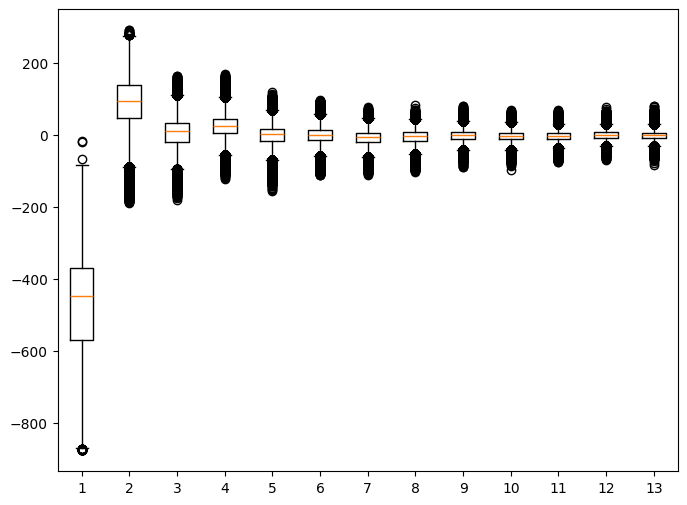

In [9]:
#show value distribution of all the mfcc features #
plt.figure(figsize=(8, 6))
new_array = all_mfcc[:, :13]
print(new_array.shape)
plt.boxplot(new_array)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.grid(True)
plt.show()


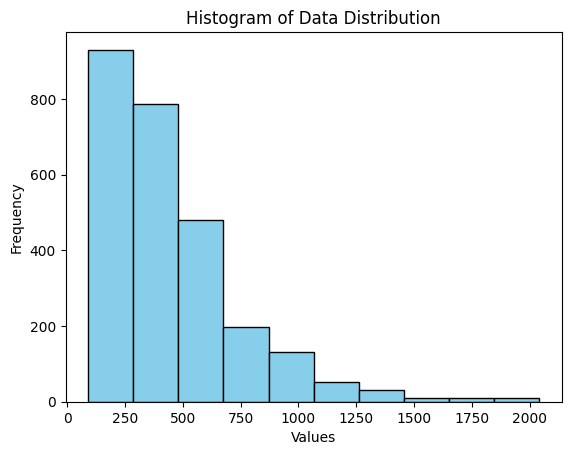

In [10]:
#Plot audio lengths per speaker distribution#

plt.hist(audio_lengths, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')

# Show the plot
plt.show()

(575551, 13)
(575357, 13)


<Figure size 800x600 with 0 Axes>

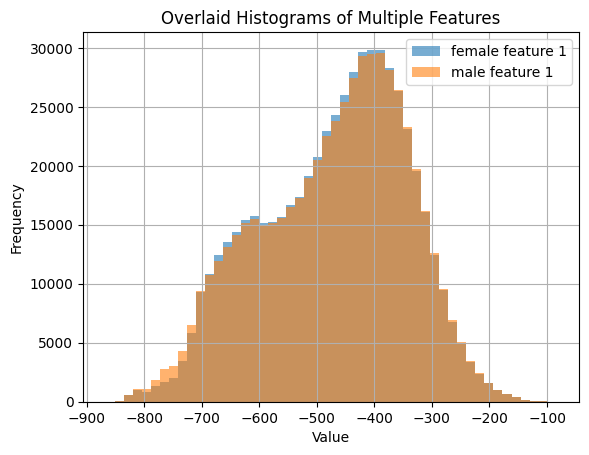

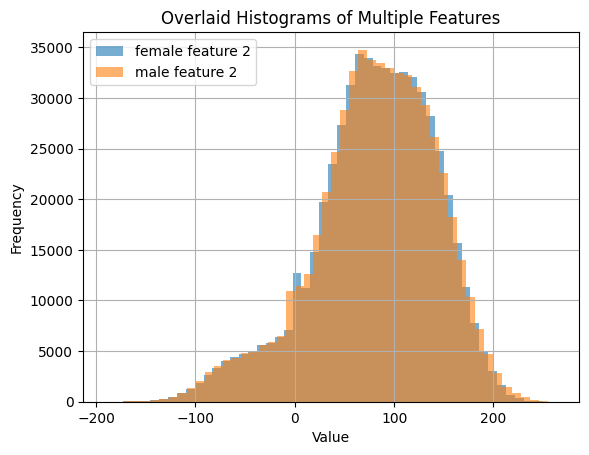

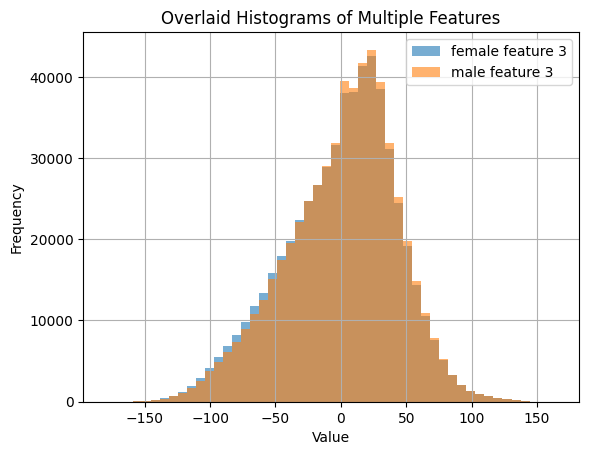

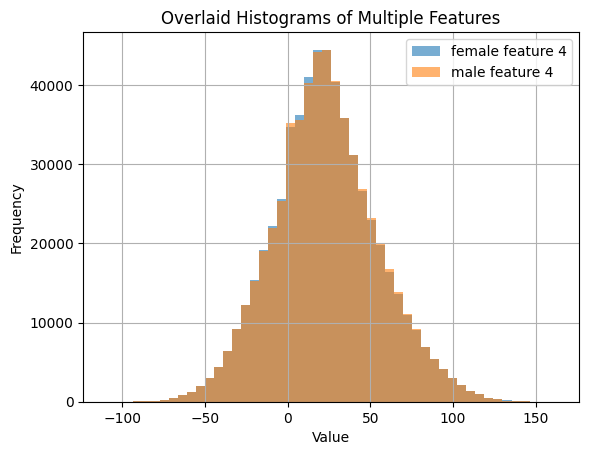

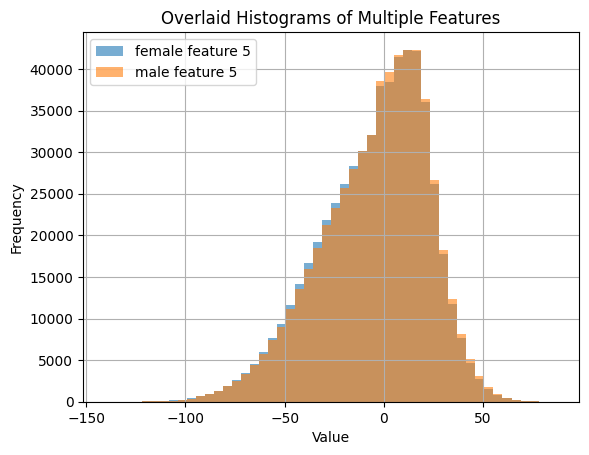

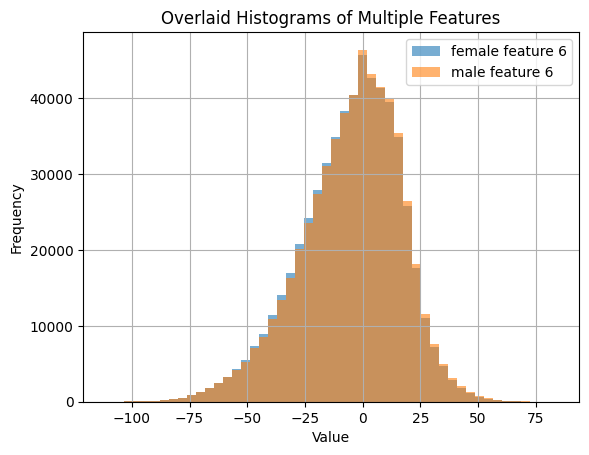

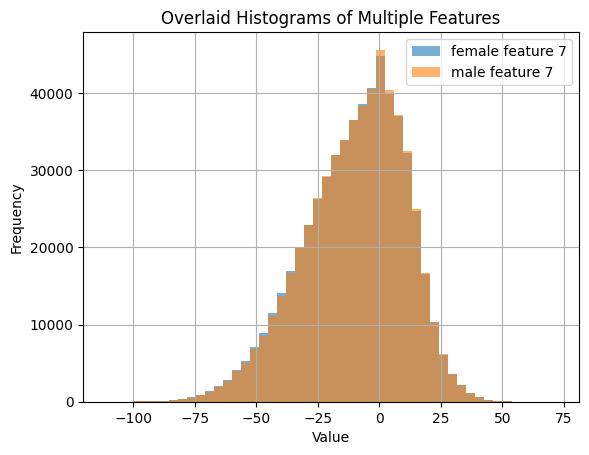

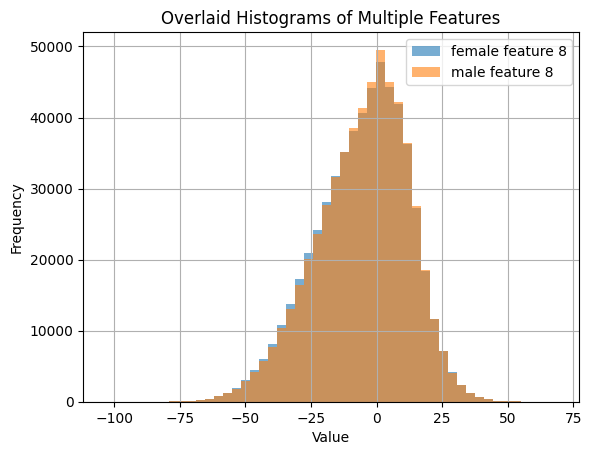

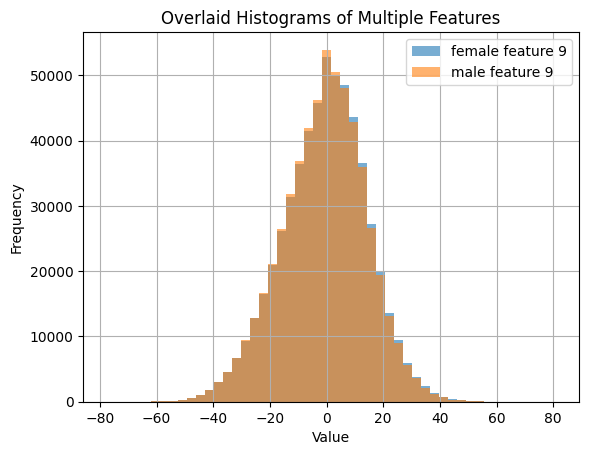

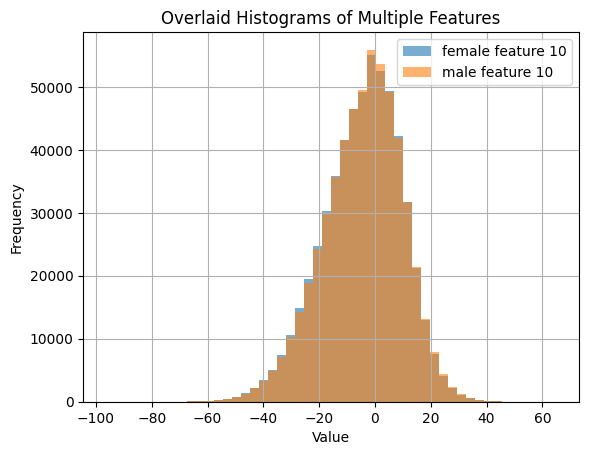

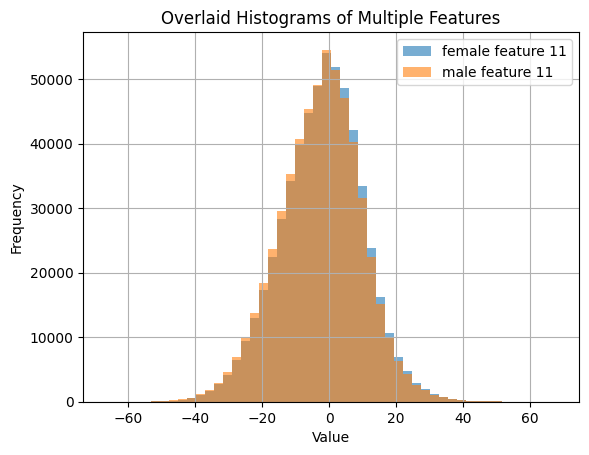

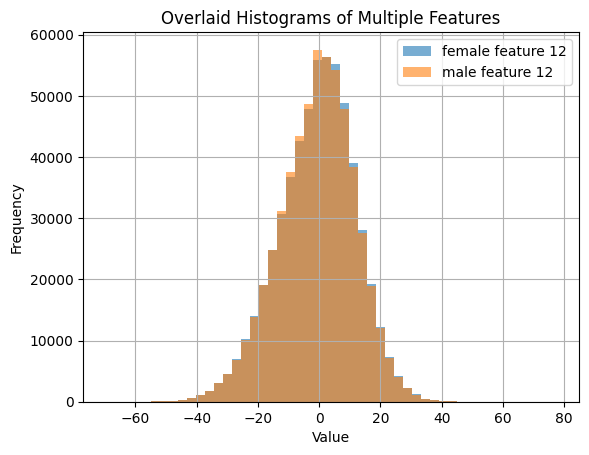

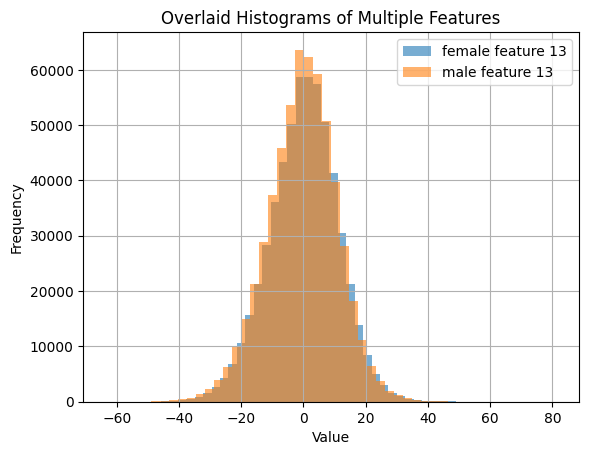

In [11]:
#male and female mfcc feature distribution#

plt.figure(figsize=(8, 6))
count=0
male_features=np.empty((0,13))
female_features = np.empty((0, 13))
for j in range(0,(39)):
    rows = slice(count, count+int(speaker_info[j][3]))
    #print(speaker_info[j][3])
    current=(np.array(new_array[rows]))
    #print(current.shape)
    count=count+int(speaker_info[j][3])
    if speaker_info[j][1]=="F":
        female_features = np.vstack((female_features, current))
    else:
        male_features = np.vstack((female_features, current))

       # male_features=np.concatenate((male_features,np.array(new_array[rows][:,1]),axis=0)
        
print(female_features.shape)
print(male_features.shape)
for i in range(0,13):
    plt.figure()
    plt.hist(female_features[:,i], bins=50, alpha=0.6,label=f'female feature {i+1}')
    plt.hist(male_features[:,i], bins=50, alpha=0.6,label=f'male feature {i+1}')
    
    plt.title('Overlaid Histograms of Multiple Features')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

In [6]:
#few more imports and static values#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D
from tensorflow.keras.layers import LSTM,Input,Dense,Dropout,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import xgboost as xgb
output_file_path="/Users/maitry/Data/Project_LibriSpeech/LibriSpeech/"
n_steps=157
n_features=13
segment_features_file_name="segmentwise_mfcc_features1.pkl"
frame_features_file_name="framewise_mfcc_features1.pkl"
out=open("store_output.txt", "a")

/var/folders/nz/4z10mmvn3p1d101m7w47n8900000gn/T/ipykernel_43713/1850144280.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/maitry/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [13]:
#store features to use later on#
def pickle_file_store(file_path,file_name,data):
    with open(file_path+file_name, 'wb') as file:    
    # A new file will be created
        pickle.dump(data, file)

extracted_features_seg_df=pd.DataFrame(extracted_features_seg,columns=["Feature","Speaker","Gender"])
extracted_features_frame_df=pd.DataFrame(extracted_features_frame,columns=["Feature","Speaker","Gender"])

pickle_file_store(pickle_files_path,segment_features_file_name,extracted_features_seg_df)
pickle_file_store(pickle_files_path,frame_features_file_name,extracted_features_frame_df)

In [7]:
#load stored features#
def pickle_file_load(file_path,file_name):
    with (open(file_path+file_name, "rb")) as testfile:
        file_new=pickle.load(testfile)
    return file_new
extracted_features_segwise=pickle_file_load(pickle_files_path,segment_features_file_name)
extracted_features_framewise=pickle_file_load(pickle_files_path,frame_features_file_name)

In [8]:
#train and test data creation for SVM, Random Forest, XGBoost algorithms - usesegwise features #

X_train, X_test, y_train, y_test = train_test_split(extracted_features_segwise["Feature"], extracted_features_segwise["Gender"], test_size=0.2, random_state=42)

X_train = np.stack(X_train)
print("*",X_train.shape)
#y_train=y_train
y_train = np.stack(y_train)
print(y_train.shape)
X_test= X_test
X_test = np.stack( X_test)
print(X_test.shape)
y_test = np.stack(y_test)
X_train=X_train.reshape(-1,157*13)
X_test=X_test.reshape(-1,157*13)

print(y_test.shape)


* (7105, 157, 13)
(7105,)
(1777, 157, 13)
(1777,)


In [9]:
#SVM Classifier 's variables and different results with variables#

param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ["linear",'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,cv= 2,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
out.write(grid.best_estimator_)
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  21.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  22.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  22.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  20.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  22.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  21.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  22.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.6s
[CV] END .......................C=0.1, gamma=0.1

TypeError: write() argument must be str, not SVC

In [11]:
svm_classifier=grid.best_estimator_
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.74      0.81      0.77       838
           M       0.81      0.75      0.78       939

    accuracy                           0.78      1777
   macro avg       0.78      0.78      0.78      1777
weighted avg       0.78      0.78      0.78      1777



In [30]:
#perform random search on all parameters of random forest#
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
import math

y_all = np.array([0 if gender == "F" else 1 for gender in extracted_features_segwise["Gender"]])
X_train, X_test, y_train, y_test = train_test_split(extracted_features_segwise["Feature"], y_all, test_size=0.2, random_state=42)

X_train = np.stack(X_train)
print("*",X_train.shape)
#y_train=y_train
y_train = np.stack(y_train)
print(y_train.shape)
X_test= X_test
X_test = np.stack( X_test)
print(X_test.shape)
y_test = np.stack(y_test)
X_train=X_train.reshape(-1,157*13)
X_test=X_test.reshape(-1,157*13)

# Number of trees in random forest
n_estimators = [50,70,90,110,130,150]
# Number of features to consider at every split
#max_features = ['log2', 'sqrt']
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               ##'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
print(random_grid)

sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train)
print(X_train.shape)
X_test_scale=sc.transform(X_test)

rf = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scale, y_train)

best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test_scale)
#print(y_pred)
y_pred=[math.floor(number + 0.5) for number in y_pred]
#print(y_pred)
print(grid.best_estimator_)
#out.write(grid.best_estimator_)
print(classification_report(y_test, y_pred))

* (7105, 157, 13)
(7105,)
(1777, 157, 13)
{'n_estimators': [50, 70, 90, 110, 130, 150]}
(7105, 2041)
Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] END ....................................n_estimators=50; total time= 5.7min
[CV] END ....................................n_estimators=70; total time= 8.3min
[CV] END ....................................n_estimators=90; total time=10.7min
[CV] END ...................................n_estimators=110; total time=13.1min
[CV] END ...................................n_estimators=130; total time=15.5min
[CV] END ...................................n_estimators=150; total time=17.9min
SVC(C=0.1, gamma=1, kernel='poly')
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       838
           1       0.84      0.86      0.85       939

    accuracy                           0.84      1777
   macro avg       0.84      0.84      0.84      1777
weighted avg       0.84      0.84      0.84    

In [32]:
#basic randomforest prediction, which is equivalent to grid search. Thus, not using grid search in future #
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(extracted_features_segwise["Feature"], extracted_features_segwise["Gender"], test_size=0.2, random_state=42)

X_train = np.stack(X_train)
print("*",X_train.shape)
#y_train=y_train
y_train = np.stack(y_train)
print(y_train.shape)
X_test= X_test
X_test = np.stack( X_test)
print(X_test.shape)
y_test = np.stack(y_test)
X_train=X_train.reshape(-1,157*13)
X_test=X_test.reshape(-1,157*13)

n_estimators=[100,150]
print(X_train.shape)
print(y_train.shape)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
print(X_train.shape)
X_test=sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)

rfc=RandomForestClassifier(n_estimators=n_estimators[0])
model1=rfc.fit(X_train,y_train)
y_pred1 = rfc.predict(X_test)
print(classification_report(y_test, y_pred1))


rfc=RandomForestClassifier(n_estimators=n_estimators[1])
model1=rfc.fit(X_train,y_train)
y_pred1 = rfc.predict(X_test)
print(classification_report(y_test, y_pred1))

* (7105, 157, 13)
(7105,)
(1777, 157, 13)
(7105, 2041)
(7105,)
(7105, 2041)
(1777, 2041)
(1777,)
              precision    recall  f1-score   support

           F       0.81      0.82      0.82       838
           M       0.84      0.83      0.83       939

    accuracy                           0.83      1777
   macro avg       0.83      0.83      0.83      1777
weighted avg       0.83      0.83      0.83      1777

              precision    recall  f1-score   support

           F       0.82      0.84      0.83       838
           M       0.85      0.84      0.85       939

    accuracy                           0.84      1777
   macro avg       0.84      0.84      0.84      1777
weighted avg       0.84      0.84      0.84      1777



In [33]:
#do xgboost with n-estimators=100, as there is not much difference in accuracy with other parameters#
y_all = np.array([np.array([1,0]) if gender == "F" else np.array([0,1]) for gender in extracted_features_segwise["Gender"]])
X_train, X_test, y_train, y_test = train_test_split(extracted_features_segwise["Feature"], y_all, test_size=0.2, random_state=42)

X_train = np.stack(X_train)
print("*",X_train.shape)
#y_train=y_train
y_train = np.stack(y_train)
print(y_train.shape)
X_test= X_test
X_test = np.stack( X_test)
print(X_test.shape)
y_test = np.stack(y_test)
X_train=X_train.reshape(-1,157*13)
X_test=X_test.reshape(-1,157*13)

print(y_test.shape)

print(y_train)
model1 = xgb.XGBClassifier(n_estimators=100)
model1.fit(X_train, y_train)
y_pred2 = model1.predict(X_test)
print(classification_report(y_test, y_pred2))

* (7105, 157, 13)
(7105, 2)
(1777, 157, 13)
(1777, 2)
[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       838
           1       0.90      0.85      0.87       939

   micro avg       0.87      0.87      0.87      1777
   macro avg       0.87      0.87      0.87      1777
weighted avg       0.87      0.87      0.87      1777
 samples avg       0.87      0.87      0.87      1777



In [37]:
#two kinds of LSTM models used here - one very simple, other having two more RNN layers. Because this data is sequencial, using LSTM makes sense. #

class our_features_audio:
    def model_construction(n_steps,n_features):
        input1 = Input(shape=(n_steps,n_features))
        x = Bidirectional(LSTM(32))(input1)
        #x = GlobalMaxPool1D()(x)
        #x = Dense(256,activation='relu')(x)
        #x = Dropout(0.1)(x)
        x = Dense(32,activation='relu')(x)
        #x = Dropout(0.1)(x)
        #x = Dense(32,activation='relu')(x)
        x = Dense(2,activation='softmax')(x)
        model = Model(inputs=input1,outputs=x)
        optimizer = Adam(lr=0.0005)
        model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
        print(model.summary())
        return(model)
    def model_construction1(n_steps,n_features):
        input1 = Input(shape=(n_steps,n_features))
        x = Bidirectional(LSTM(32))(input1)
        #x = GlobalMaxPool1D()(x)
        x = Dense(128,activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(64,activation='relu')(x)
        x = Dropout(0.1)(x)
        #x = Dense(32,activation='relu')(x)
        x = Dense(2,activation='softmax')(x)
        model = Model(inputs=input1,outputs=x)
        optimizer = Adam(lr=0.0005)
        model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
        print(model.summary())
        return(model)
    
    def fit(model, x_train,y_train,x_val,y_val,val_identifier,n_steps,model_path):
        model_name="LSTM"+"_"+val_identifier+"_"+str(n_steps)+".hdf5"
        model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=100, batch_size=32, callbacks= [EarlyStopping(monitor='val_loss', patience=5), ModelCheckpoint((model_path+model_name), save_best_only=True, save_weights_only=False, mode='auto', period=1)])
        return model
    def evel(model,x_val,y_val,val_identifier,n_steps,model_path):
        model_name="LSTM"+"_"+val_identifier+"_"+str(n_steps)+".hdf5"
        model.load_weights((model_path+model_name))
        y_predicted=model.predict(x_val)
        y_predicted = np.argmax(y_predicted, axis=1)
        y_val=np.argmax(y_val, axis=1)
        acc=accuracy_score(y_val,y_predicted)
        conf_mat=confusion_matrix(y_val,y_predicted)
        f1_sc=f1_score(y_val,y_predicted)
        return(acc,conf_mat,f1_sc)

In [38]:

#running two kinds of bilstms as per two models created in above, more complex model does not mean better output. #
model_output_path="/Users/maitry/Data/Project_LibriSpeech/LibriSpeech/pickle/"

X_train, X_temp, y_train, y_temp = train_test_split(extracted_features_segwise["Feature"], y_all, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = np.stack(X_train)
print("*",X_train.shape)
#y_train=y_train
y_train = np.stack(y_train)
print(y_train.shape)
X_test= X_test
X_test = np.stack( X_test)
print(X_test.shape)
y_test = np.stack(y_test)
X_val = np.stack( X_val)
print(X_test.shape)
y_val = np.stack(y_val)

#X_train=X_train.reshape(-1,157*13)
#X_test=X_test.reshape(-1,157*13)
model=our_features_audio.model_construction(157,13)
model=our_features_audio.fit(model,X_train,y_train,X_val,y_val,"1","157",model_output_path)
acc,conf_mat,f1_sc=our_features_audio.evel(model,X_test,y_test,"1","157",model_output_path)
print(acc,"\n",conf_mat,"\n",f1_sc)
#out.write(acc,conf_mat,f1_sc,"\n")

model1=our_features_audio.model_construction1(157,13)
model1=our_features_audio.fit(model1,X_train,y_train,X_val,y_val,"1","157",model_output_path)
acc,conf_mat,f1_sc=our_features_audio.evel(model1,X_test,y_test,"1","157",model_output_path)
print(acc,"\n",conf_mat,"\n",f1_sc)
#out.write(acc,conf_mat,f1_sc,"\n")


* (6217, 157, 13)
(6217, 2)
(1333, 157, 13)
(1333, 157, 13)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 157, 13)]         0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                11776     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 13922 (54.38 KB)
Trainable params: 13922 (54.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/100
195/195 [==============================] - 4s 16ms/step - loss: 0.5852 - accuracy: 0.7151 - val_loss: 0.4575 - val_accuracy: 0.7988
Epoch 2/100
 13/195 [=>............................] - ETA: 2s - loss: 0.4466 - accuracy: 0.8101

/Users/maitry/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/195 [==============================] - 3s 14ms/step - loss: 0.3429 - accuracy: 0.8507 - val_loss: 0.2602 - val_accuracy: 0.8776
Epoch 3/100
195/195 [==============================] - 3s 14ms/step - loss: 0.2451 - accuracy: 0.8893 - val_loss: 0.2227 - val_accuracy: 0.8994
Epoch 4/100
195/195 [==============================] - 3s 14ms/step - loss: 0.2090 - accuracy: 0.9049 - val_loss: 0.1994 - val_accuracy: 0.9107
Epoch 5/100
195/195 [==============================] - 3s 15ms/step - loss: 0.1924 - accuracy: 0.9102 - val_loss: 0.1944 - val_accuracy: 0.9092
Epoch 6/100
195/195 [==============================] - 3s 14ms/step - loss: 0.1737 - accuracy: 0.9241 - val_loss: 0.1955 - val_accuracy: 0.9107
Epoch 7/100
195/195 [==============================] - 3s 14ms/step - loss: 0.1732 - accuracy: 0.9162 - val_loss: 0.1754 - val_accuracy: 0.9137
Epoch 8/100
195/195 [==============================] - 3s 14ms/step - loss: 0.1611 - accuracy: 0.9241 - val_loss: 0.1820 - val_accuracy: 0.9189
Epoc

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 157, 13)]         0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                11776     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                           

Epoch 1/100
195/195 [==============================] - 4s 16ms/step - loss: 0.5727 - accuracy: 0.7007 - val_loss: 0.3914 - val_accuracy: 0.7950
Epoch 2/100
 13/195 [=>............................] - ETA: 2s - loss: 0.3653 - accuracy: 0.8317

/Users/maitry/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/195 [==============================] - 3s 15ms/step - loss: 0.3276 - accuracy: 0.8459 - val_loss: 0.2383 - val_accuracy: 0.8889
Epoch 3/100
195/195 [==============================] - 3s 15ms/step - loss: 0.2398 - accuracy: 0.8922 - val_loss: 0.1866 - val_accuracy: 0.9084
Epoch 4/100
195/195 [==============================] - 3s 15ms/step - loss: 0.2038 - accuracy: 0.9038 - val_loss: 0.2212 - val_accuracy: 0.8986
Epoch 5/100
195/195 [==============================] - 3s 15ms/step - loss: 0.1891 - accuracy: 0.9115 - val_loss: 0.1741 - val_accuracy: 0.9107
Epoch 6/100
195/195 [==============================] - 3s 15ms/step - loss: 0.1756 - accuracy: 0.9170 - val_loss: 0.1730 - val_accuracy: 0.9182
Epoch 7/100
195/195 [==============================] - 3s 16ms/step - loss: 0.1675 - accuracy: 0.9226 - val_loss: 0.1486 - val_accuracy: 0.9279
Epoch 8/100
195/195 [==============================] - 3s 15ms/step - loss: 0.1510 - accuracy: 0.9252 - val_loss: 0.1627 - val_accuracy: 0.9182
Epoc

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris=load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
